# CHAMPIPI model for mushroom recognition

Import fastai and torch frameworks

In [1]:
from fastai.vision import *
from fastai.widgets import *

In [2]:
import torch
torch.cuda.empty_cache()

In [3]:
#GPU fastai
from pynvml import *
nvmlInit()
handle = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(handle)
print("Total memory:", info.total)
print("Free memory:", info.free)
print("Used memory:", info.used)

nvmlInit()
try:
    deviceCount = nvmlDeviceGetCount()
    for i in range(deviceCount):
        handle = nvmlDeviceGetHandleByIndex(i)
        print("Device", i, ":", nvmlDeviceGetName(handle))
except NVMLError as error:
    print(error)

Total memory: 4294967296
Free memory: 2097885184
Used memory: 2197082112
Device 0 : b'GeForce GTX 1050 Ti'


In [4]:
#folders where there are the mushrooms images
folders = ['cepes','chanterelles_trompettes_girolles', 'oronges', 'pied_moutons', 'sanguins','veneneux']

#files for downloading the images from internet
#files = ['urls_cepes.txt','urls_chanterelles.txt','urls_trompettes.txt','urls_girolles.txt', 'urls_oronges.txt','urls_moutons.txt',
           #'urls_sanguins.txt']#,'urls_veneneux.txt']

In [5]:
# path or make the folder when you download pictures
path = Path('D:/champignons/newdata_latin')
#for folder in folders:
#    dest = path/folder
#    dest.mkdir(parents=True, exist_ok=True)

In [6]:
# download pictures in each folders
#for i, folder in enumerate(folders):
    #dest = path
    #print(dest)
    
    #download_images(path/files[i], dest)#, max_pics = 500)

In [7]:
#import os

#list1 = os.listdir(path/'veneneux') # dir is your directory path
#number_files = len(list1)
#print(number_files)

In [8]:
# the class of differents varieties
classes = ['cepes', 'chanterelles_trompettes_girolles', 'oronges', 'pied_moutons', 'sanguins','veneneux']


In [9]:
# verify the pictures
#for c in classes:
#    print(c)
#    verify_images(path/c, delete=True)#, max_size=500)

look the data, we use 80% for training and 20% of images for validation
This module contains the classes that define datasets handling Image objects and their transformations. 
Before any work can be done a dataset needs to be converted into a DataBunch object, and in the case of the computer vision data - specifically into an ImageDataBunch subclass.

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(),
                                  size=224,#size of the picture
                                  num_workers=0,
                                  bs=32,
                                  classes = ['cepes', 'chanterelles_trompettes_girolles', 'oronges', 'pied_moutons', 'sanguins','veneneux']).normalize(imagenet_stats)

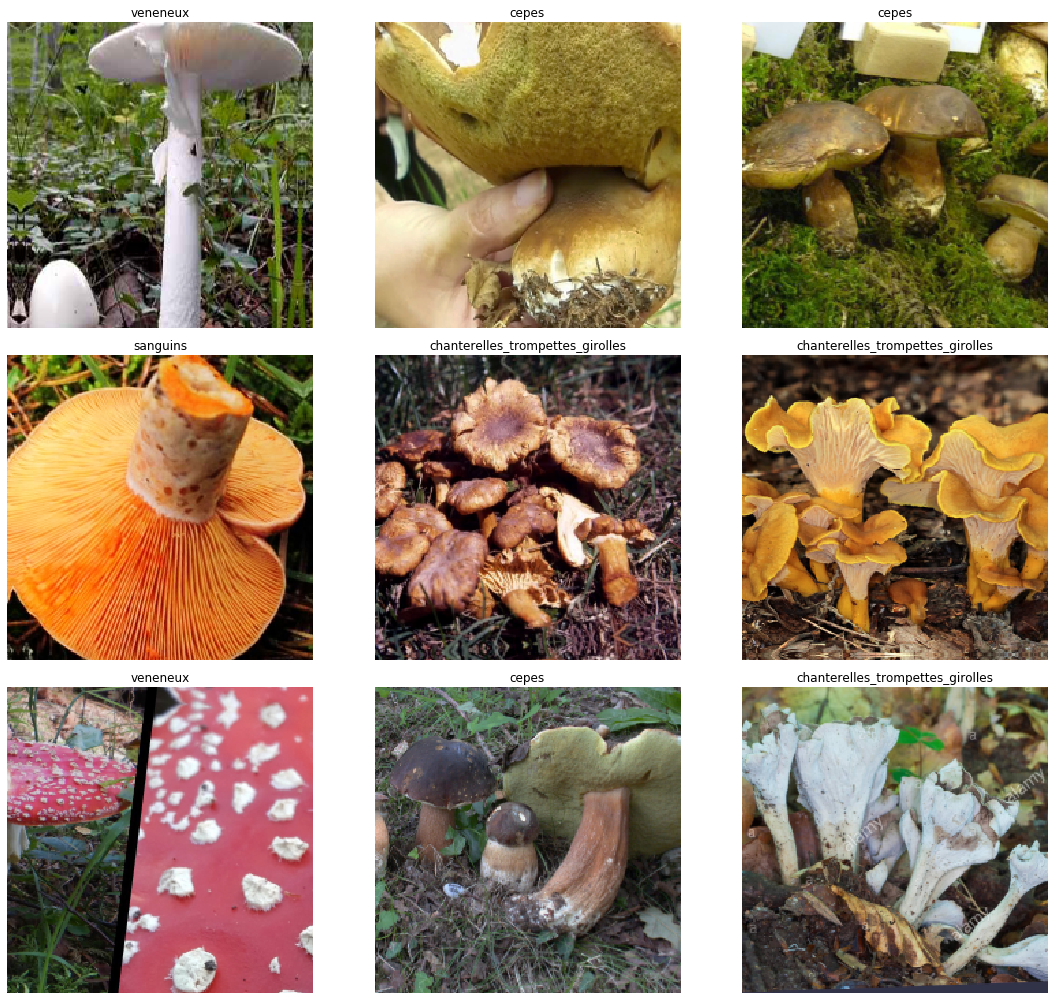

In [11]:
data.show_batch(rows=3, figsize=(16,14))

In [12]:
#number of repository with the numbers of images for training an validation set
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cepes',
  'chanterelles_trompettes_girolles',
  'oronges',
  'pied_moutons',
  'sanguins',
  'veneneux'],
 6,
 1580,
 395)

define the model with parameters metrics accuracy and error rate and display the graph of training curve

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,1.640132,0.468972,0.858228,0.799981,02:01
1,0.997347,0.325855,0.898734,0.850126,01:48
2,0.633933,0.275719,0.911392,0.882401,01:51
3,0.457911,0.275759,0.913924,0.877497,01:51
4,0.353484,0.270988,0.913924,0.878997,01:49


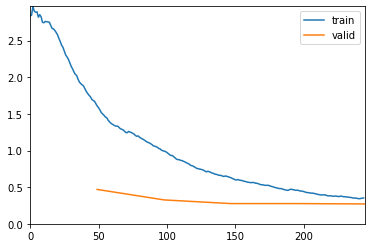

In [14]:
learn = cnn_learner(data, models.resnet34, 
                    metrics=[accuracy, KappaScore(weights="quadratic")], 
                    callback_fns=ShowGraph)
learn.fit_one_cycle(5)

save the model

In [ ]:
learn.save('champipi_stage1_91.11')

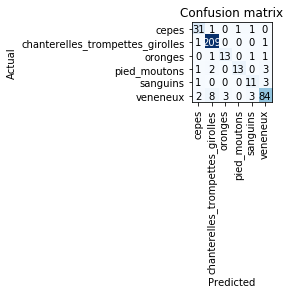

In [15]:
#do the matrix confusion
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


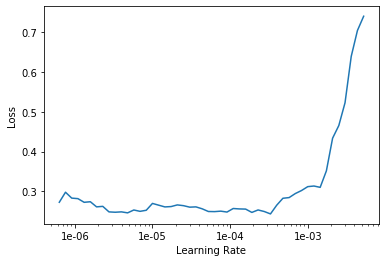

In [17]:
#fine tuning the model
# unfreeze all layers
learn.unfreeze()
#find learning rate
learn.lr_find()
#plot learning rate
learn.recorder.plot()
#learn.save('champi_stage-1_complet')

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.346035,0.332434,0.911392,0.865531,03:58
1,0.330879,0.328004,0.908861,0.860467,03:57
2,0.218992,0.259329,0.931646,0.898149,04:03


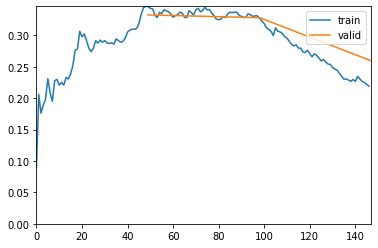

In [18]:
#re train the model for the last layers
learn.fit_one_cycle(3, max_lr=slice(3e-6,3e-3))

export the model to be able to use it

In [19]:
learn.save('champipi_93_new')
learn.export('champipi_93_new.pkl')

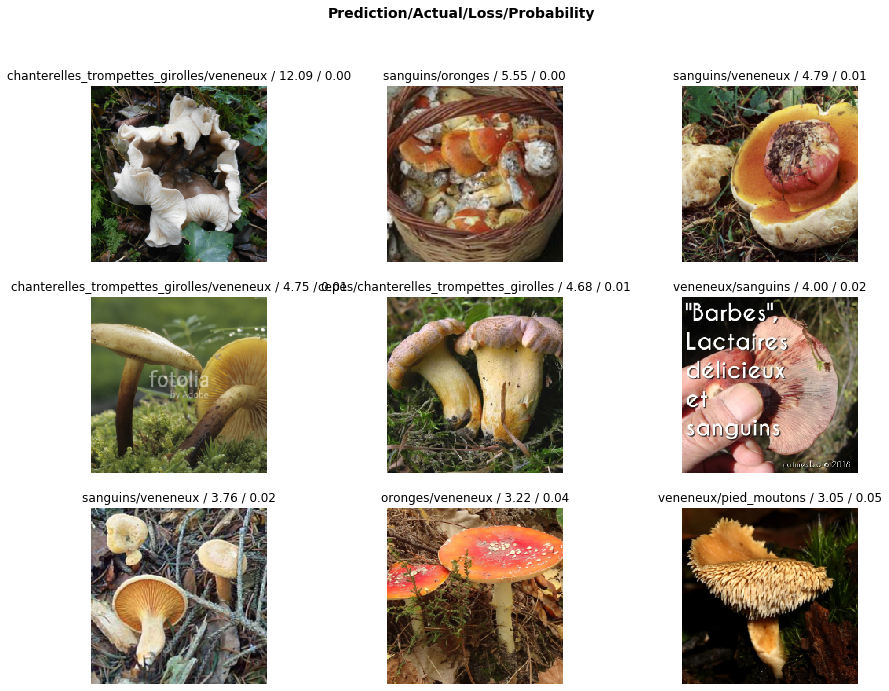

In [20]:
interp.plot_top_losses(9,figsize=(15,11))

In [21]:
interp.most_confused(min_val=2)

[('veneneux', 'chanterelles_trompettes_girolles', 8),
 ('pied_moutons', 'veneneux', 3),
 ('sanguins', 'veneneux', 3),
 ('veneneux', 'oronges', 3),
 ('veneneux', 'sanguins', 3),
 ('pied_moutons', 'chanterelles_trompettes_girolles', 2),
 ('veneneux', 'cepes', 2)]

# validate the model on new data never see:

In [22]:
data.classes

['cepes',
 'chanterelles_trompettes_girolles',
 'oronges',
 'pied_moutons',
 'sanguins',
 'veneneux']

In [23]:
#load the model trained
data2 = ImageDataBunch.single_from_classes(path, data.classes, 
        ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn=cnn_learner(data2,models.resnet34)
learn.load('champipi_93_new')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\champignons\newdata_latin;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\champignons\newdata_latin;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

# Make predictions on new images

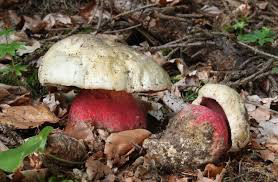

In [24]:
path2 = Path('D:\Champignons')

img=open_image(path2/'tel'/'satan.JPG')
#img1=open_image(path2/'tel'/'sangui.JPG')
img

In [25]:
# make prediction on new pictures that the network didn't known
pred_class=learn.predict(img)
pred_class

(Category veneneux,
 tensor(5),
 tensor([4.1632e-06, 2.0360e-08, 4.9509e-05, 2.1337e-06, 8.5475e-05, 9.9986e-01]))

In [26]:

datadir=Path('D:/Champignons/tel/')
test = ImageDataBunch.from_folder(datadir,
                                  test='test',
                                  valid_pct=0,
                                  seed=42,
                                  bs=32,
                                  ds_tfms=get_transforms(), 
                                  size=47).normalize(imagenet_stats)
test

ImageDataBunch;

Train: LabelList (47 items)
x: ImageList
Image (3, 47, 47),Image (3, 47, 47),Image (3, 47, 47),Image (3, 47, 47),Image (3, 47, 47)
y: CategoryList
tel,tel,tel,tel,tel
Path: D:\Champignons\tel;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Champignons\tel;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: D:\Champignons\tel

In [27]:
#make prediction on the path
from pathlib import Path

path3 = Path('D:/Champignons/tel/')
#pred=[]
for i in range(0,46):
    #if i.endswith(".jpg"):
    #p = learn.predict(test.x[i]) 
    y=[x for x in path3.iterdir() ]
    print(y[i])
    #print(str(p[0]))
    print(learn.predict(test.x[i]) )



D:\Champignons\tel\amanite mouche.jpg
(Category veneneux, tensor(5), tensor([4.9082e-08, 1.4588e-11, 2.5212e-06, 3.3526e-08, 7.6391e-07, 1.0000e+00]))
D:\Champignons\tel\bad-tromp.jpg
(Category cepes, tensor(0), tensor([9.3885e-01, 3.9362e-02, 1.5249e-04, 2.1536e-02, 8.8755e-05, 1.1640e-05]))
D:\Champignons\tel\bad.jpg
(Category chanterelles_trompettes_girolles, tensor(1), tensor([0.0055, 0.9738, 0.0069, 0.0025, 0.0029, 0.0084]))
D:\Champignons\tel\bad1.jpg
(Category chanterelles_trompettes_girolles, tensor(1), tensor([9.1231e-05, 9.1327e-01, 1.5029e-04, 5.6576e-06, 8.6354e-02, 1.3141e-04]))
D:\Champignons\tel\bad2.jpg
(Category pied_moutons, tensor(3), tensor([0.4233, 0.0403, 0.0027, 0.4936, 0.0096, 0.0304]))
D:\Champignons\tel\bolet.jpg
(Category cepes, tensor(0), tensor([9.9997e-01, 1.0329e-09, 2.2551e-07, 1.0540e-07, 1.2707e-05, 2.0890e-05]))
D:\Champignons\tel\cep-tromp.jpg
(Category chanterelles_trompettes_girolles, tensor(1), tensor([1.2469e-03, 9.6861e-01, 3.4328e-04, 1.5295e-0

conclusion:


The model make some 